In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv(r'sample1.csv',encoding = "ISO-8859-1")
data2 = pd.read_csv(r'sample2.csv',encoding = "ISO-8859-1")

C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7,32,33,42,63,66,72,76,128,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data2 = data2.loc[data2['LOB'] == 'AL']

In [4]:
data1.head()

CLMNO OCCURRENCE  CLNTNO  NET_INDEMNITY_RESERVE  NET_EXPENSE_RESERVE  \
0  PHPB-7904A2  PHPB-7904    6902                      0                    0   
1  PHPB-7905A2  PHPB-7905    6902                      0                    0   
2  PHPB-7906A2  PHPB-7906    6902                      0                    0   
3  PHPB-7907A2  PHPB-7907    6902                      0                    0   
4  PHPB-8275A9  PHPB-8275    6902                      0                    0   

     CARRIERCLMNO CLIENTSCLMNO THIRDNUM        ADJUSTER  LOSSDATE    ...      \
0  646-226907 001          NaN      NaN  BARBARA LASTER  20160906    ...       
1  646-226913 001       157372      NaN  TRACY BUCHANAN  20160805    ...       
2  646-226914 001          NaN      NaN  BARBARA HUGHES  20160906    ...       
3  646-226915 001          NaN      NaN    PAUL MCGRATH  20160827    ...       
4  646-228497 001          NaN      NaN  BARBARA HUGHES  20160427    ...       

  AWM_Owner_Retained_Salvage_Amount                            AWM_Cause_Code  \
0                               NaN                           AL --IV BACKING   
1                               NaN  AL --Loading / unloading damage premises   
2                               NaN                           AL --IV BACKING   
3                               NaN                     GL --IMPROPER HOOK-UP   
4                               NaN                      AL --I/V STRUCK TREE   

   AWM_Ref._to_Carrier_for_Recovery  AWM_Salvage  \
0                               NaN          NaN   
1                               NaN          NaN   
2                               NaN          NaN   
3                               NaN          NaN   
4                               NaN          NaN   

  AWM_TF_Final_Mile_Branch_Code AWM_TF/Final_Mile_Contractor  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  AWM_UST_Branch_Code AWM_Van_Line AWM_Voluntary_Payment Deductible  
0                 NaN          NaN                   NaN     250000  
1                 NaN          NaN                   NaN     250000  
2                 NaN          NaN                   NaN     100000  
3                 NaN          NaN                   NaN     200000  
4                 NaN          NaN                   NaN     100000  

[5 rows x 147 columns]

In [5]:
data1.shape

(12417, 147)

In [6]:
data2.head()

CLMNO OCCURRENCE  CLNTNO  NET_INDEMNITY_RESERVE  NET_EXPENSE_RESERVE  \
0  ZUMS-3703A2  ZUMS-3703    3812                      0                    0   
1  ZUMS-3705A1  ZUMS-3705    3812                      0                    0   
2  ZUMS-3705A2  ZUMS-3705    3812                      0                    0   
3  ZUMS-3706A2  ZUMS-3706    3812                      0                    0   
4  ZUMS-3707A9  ZUMS-3707    3812                      0                    0   

  CARRIERCLMNO CLIENTSCLMNO THIRDNUM      ADJUSTER  LOSSDATE  \
0          NaN          NaN      NaN   LISSA YOUNG  20120611   
1          NaN          NaN      NaN  JANICE DUKES  20120615   
2          NaN          NaN      NaN  JANICE DUKES  20120615   
3          NaN          NaN      NaN   TERRI KANEY  20120613   
4          NaN          NaN      NaN   TERRI KANEY  20120611   

           ...          AWM_Order_Number  AWM_Owner_Retained_Salvage_Amount  \
0          ...                       NaN                                NaN   
1          ...                       NaN                                NaN   
2          ...                       NaN                                NaN   
3          ...                       NaN                                NaN   
4          ...                       NaN                                NaN   

   AWM_Cause_Code  AWM_Ref._to_Carrier_for_Recovery AWM_Salvage  \
0             NaN                               NaN         NaN   
1             NaN                               NaN         NaN   
2             NaN                               NaN         NaN   
3             NaN                               NaN         NaN   
4             NaN                               NaN         NaN   

  AWM_TF_Final_Mile_Branch_Code AWM_TF/Final_Mile_Contractor  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  AWM_UST_Branch_Code AWM_Van_Line AWM_Voluntary_Payment  
0                 NaN          NaN                   NaN  
1                 NaN          NaN                   NaN  
2                 NaN          NaN                   NaN  
3                 NaN          NaN                   NaN  
4                 NaN          NaN                   NaN  

[5 rows x 146 columns]

In [7]:
data2.shape

(28146, 146)

In [8]:
data2.isna().sum(axis=0)

CLMNO                                    0
OCCURRENCE                               0
CLNTNO                                   0
NET_INDEMNITY_RESERVE                    0
NET_EXPENSE_RESERVE                      0
CARRIERCLMNO                         12050
CLIENTSCLMNO                         26579
THIRDNUM                             27044
ADJUSTER                               135
LOSSDATE                                 0
STATUS                                   0
OPENDATE                                 0
CLOSEDATE                              749
REOPENDATE                           25714
LOB                                      0
COVERAGE                                 0
STATE                                    0
DESCR                                   15
DESCR2                               22530
INJURIES                             15014
CAUSE                                21339
ANATOMY                                  0
IPOLNO                                   0
IEFFDT     

In [9]:
data1.isna().sum(axis=0)

CLMNO                                    0
OCCURRENCE                               0
CLNTNO                                   0
NET_INDEMNITY_RESERVE                    0
NET_EXPENSE_RESERVE                      0
CARRIERCLMNO                           277
CLIENTSCLMNO                         12093
THIRDNUM                             12408
ADJUSTER                               970
LOSSDATE                                 0
STATUS                                   0
OPENDATE                                 0
CLOSEDATE                             1127
REOPENDATE                           11263
LOB                                      0
COVERAGE                                 0
STATE                                    0
DESCR                                    1
DESCR2                                7565
INJURIES                              3590
CAUSE                                12417
ANATOMY                                  0
IPOLNO                                   0
IEFFDT     

In [10]:
data1 = data1.dropna(thresh=data1.shape[0]*0.5,how='all',axis=1)

In [11]:
data1.isna().sum(axis=0)

CLMNO                       0
OCCURRENCE                  0
CLNTNO                      0
NET_INDEMNITY_RESERVE       0
NET_EXPENSE_RESERVE         0
CARRIERCLMNO              277
ADJUSTER                  970
LOSSDATE                    0
STATUS                      0
OPENDATE                    0
CLOSEDATE                1127
LOB                         0
COVERAGE                    0
STATE                       0
DESCR                       1
INJURIES                 3590
ANATOMY                     0
IPOLNO                      0
IEFFDT                      0
IEXPDT                      0
CLAIMANT                    0
CSSNUM                      0
CADDR1                   1243
CCITY                    1243
CSTATE                      0
CZIP                     1243
CPHONE                   5579
CGENDER                     0
LOCDESC                    78
LOC                         0
                         ... 
INAME                       0
IADDR1                    335
ICITY     

In [12]:
data2 = data2.dropna(thresh=data2.shape[0]*0.5,how='all',axis=1)

In [13]:
data2.columns

Index(['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE',
       'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'ADJUSTER', 'LOSSDATE', 'STATUS',
       'OPENDATE', 'CLOSEDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'ANATOMY',
       'IPOLNO', 'IEFFDT', 'IEXPDT', 'CLAIMANT', 'CSSNUM', 'CADDR1', 'CCITY',
       'CSTATE', 'CZIP', 'CPHONE', 'CGENDER', 'LOCDESC', 'LOC', 'LOCTXTCODE',
       'LOCNM', 'LOCNM2', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'DIVNUM', 'ISSNUM',
       'INAME', 'IADDR1', 'ICITY', 'ISTATE', 'IZIP', 'LSTATE', 'DTAXID',
       'DSTATE', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERNAME', 'DRIVERAGE',
       'LICENSENO', 'LICSTATE', 'PLATE', 'PLATESTATE', 'EMPLSTATUS',
       'NCCI_NOI', 'NCCI_SOI', 'NCCI_SEV', 'WEEKLYWAGE', 'MARITAL',
       'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID',
       'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES',
       'INCURRED'],
      dtype='object')

In [14]:
#Removing irrelevant columns
data2 = data2.drop(['CLMNO','OCCURRENCE','CLNTNO','LOCNM','LOCDESC','LOCNM2','LOCCITY','STATE','CADDR1','CCITY','CSTATE','INAME','IADDR1','ICITY','ISTATE','DRIVERNAME','CARRIERCLMNO','ADJUSTER','IPOLNO','IEFFDT','IEXPDT','LOC','LOCTXTCODE','VINNO','LICENSENO'],axis=1)

In [15]:
data2['STATUS'] = data2['STATUS'].astype('category')
data2['LOCSTATE'] = data2['LOCSTATE'].astype('category')
data2['CGENDER'] = data2['CGENDER'].astype('category')
data2['LSTATE'] = data2['LSTATE'].astype('category')
data2['DSTATE'] = data2['DSTATE'].astype('category')
data2['MARITAL'] = data2['MARITAL'].astype('category')

In [16]:
# The columns that have null values and cannot be imputed.
data2 = data2.drop(['CZIP','PLATE','LICSTATE','PLATESTATE','CPHONE','LOB','LOCZIP','AUTOMAKE','ISSNUM','IZIP'],axis=1)

In [17]:
cat_columns = data2.select_dtypes(['category']).columns
cat_columns
data2[cat_columns] = data2[cat_columns].apply(lambda x: x.cat.codes)

In [18]:
data2.shape

(28146, 36)

In [19]:
data2.isna().sum(axis=0)

NET_INDEMNITY_RESERVE      0
NET_EXPENSE_RESERVE        0
LOSSDATE                   0
STATUS                     0
OPENDATE                   0
CLOSEDATE                749
COVERAGE                   0
DESCR                     15
ANATOMY                    0
CLAIMANT                   0
CSSNUM                     0
CGENDER                    0
LOCSTATE                   0
DIVNUM                     0
LSTATE                     0
DTAXID                     0
DSTATE                     0
VEHYEAR                    0
DRIVERAGE                  0
EMPLSTATUS                 0
NCCI_NOI                   0
NCCI_SOI                   0
NCCI_SEV                   0
WEEKLYWAGE                 0
MARITAL                    0
INDRESERVES                0
MEDRESERVES                0
EXPRESERVES                0
TOTALRESERVES              0
INDPAID                    0
MEDPAID                    0
EXPPAID                    0
YORKPAID                   0
TOTALPAID                  0
RECOVERIES    

In [20]:
data2 = data2.dropna(axis=0,how="any")
data2.reset_index(drop=True, inplace=True)

In [21]:
data2.shape

(27382, 36)

In [22]:
data2.isna().sum(axis=0)

NET_INDEMNITY_RESERVE    0
NET_EXPENSE_RESERVE      0
LOSSDATE                 0
STATUS                   0
OPENDATE                 0
CLOSEDATE                0
COVERAGE                 0
DESCR                    0
ANATOMY                  0
CLAIMANT                 0
CSSNUM                   0
CGENDER                  0
LOCSTATE                 0
DIVNUM                   0
LSTATE                   0
DTAXID                   0
DSTATE                   0
VEHYEAR                  0
DRIVERAGE                0
EMPLSTATUS               0
NCCI_NOI                 0
NCCI_SOI                 0
NCCI_SEV                 0
WEEKLYWAGE               0
MARITAL                  0
INDRESERVES              0
MEDRESERVES              0
EXPRESERVES              0
TOTALRESERVES            0
INDPAID                  0
MEDPAID                  0
EXPPAID                  0
YORKPAID                 0
TOTALPAID                0
RECOVERIES               0
INCURRED                 0
dtype: int64

In [23]:
from datetime import datetime, timedelta
#pd.to_datetime(data2['LOSSDATE'])
cols = ['LOSSDATE','OPENDATE','CLOSEDATE']
for col in cols:
    for i in range(len(data2[col])):
        s = data2[col][i]
        s = str(data2[col][i])
        date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
        data2.loc[i,col] = date

In [24]:
data2.loc[i,'LOSSDATE']

datetime.datetime(2013, 12, 15, 0, 0)

In [25]:
data2['DaysToIssue'] = (data2['OPENDATE'] - data2['LOSSDATE']).dt.days

In [26]:
data2['DaysToProcess'] = (data2['CLOSEDATE'] - data2['OPENDATE']).dt.days

In [27]:
data = data2.drop(['OPENDATE','LOSSDATE','CLOSEDATE'], axis=1)

In [28]:
data2['DaysToProcess'].head()

0    378
1    374
2    415
3      2
4     96
Name: DaysToProcess, dtype: int64

In [29]:
data2withoutTextcols = data2.drop(['COVERAGE','DESCR','CSSNUM','CLAIMANT','LOSSDATE','OPENDATE','CLOSEDATE'],axis=1)

In [30]:
data2withoutTextcols.isnull().any()

NET_INDEMNITY_RESERVE    False
NET_EXPENSE_RESERVE      False
STATUS                   False
ANATOMY                  False
CGENDER                  False
LOCSTATE                 False
DIVNUM                   False
LSTATE                   False
DTAXID                   False
DSTATE                   False
VEHYEAR                  False
DRIVERAGE                False
EMPLSTATUS               False
NCCI_NOI                 False
NCCI_SOI                 False
NCCI_SEV                 False
WEEKLYWAGE               False
MARITAL                  False
INDRESERVES              False
MEDRESERVES              False
EXPRESERVES              False
TOTALRESERVES            False
INDPAID                  False
MEDPAID                  False
EXPPAID                  False
YORKPAID                 False
TOTALPAID                False
RECOVERIES               False
INCURRED                 False
DaysToIssue              False
DaysToProcess            False
dtype: bool

In [31]:
data2withoutTextcols.dtypes

NET_INDEMNITY_RESERVE     int64
NET_EXPENSE_RESERVE       int64
STATUS                     int8
ANATOMY                   int64
CGENDER                    int8
LOCSTATE                   int8
DIVNUM                    int64
LSTATE                     int8
DTAXID                    int64
DSTATE                     int8
VEHYEAR                   int64
DRIVERAGE                object
EMPLSTATUS                int64
NCCI_NOI                  int64
NCCI_SOI                  int64
NCCI_SEV                  int64
WEEKLYWAGE                int64
MARITAL                    int8
INDRESERVES               int64
MEDRESERVES               int64
EXPRESERVES               int64
TOTALRESERVES             int64
INDPAID                   int64
MEDPAID                   int64
EXPPAID                   int64
YORKPAID                  int64
TOTALPAID                 int64
RECOVERIES                int64
INCURRED                  int64
DaysToIssue               int64
DaysToProcess             int64
dtype: o

In [32]:
for cols in data2withoutTextcols.columns:
    data2withoutTextcols[cols] = pd.to_numeric(data2withoutTextcols[cols], errors='coerce')

In [33]:
#The below is 
data2withoutTextcols = data2withoutTextcols.drop(['TOTALRESERVES','NET_INDEMNITY_RESERVE','INDRESERVES','MEDRESERVES','EXPRESERVES','MEDPAID','NET_EXPENSE_RESERVE','YORKPAID','TOTALPAID','INDPAID','EXPPAID','DaysToProcess'],axis=1)

In [34]:
data2withoutTextcols.columns

Index(['STATUS', 'ANATOMY', 'CGENDER', 'LOCSTATE', 'DIVNUM', 'LSTATE',
       'DTAXID', 'DSTATE', 'VEHYEAR', 'DRIVERAGE', 'EMPLSTATUS', 'NCCI_NOI',
       'NCCI_SOI', 'NCCI_SEV', 'WEEKLYWAGE', 'MARITAL', 'RECOVERIES',
       'INCURRED', 'DaysToIssue'],
      dtype='object')

In [35]:
import statistics
d = list(data2withoutTextcols['INCURRED'])
inc_mean = sum(d)/len(d)

In [36]:
list(data2withoutTextcols['INCURRED'])

[930924,
 0,
 0,
 471607,
 0,
 0,
 863641,
 222955,
 0,
 0,
 750000,
 0,
 755510,
 750000,
 576288,
 488245,
 470968,
 0,
 0,
 363900,
 189093,
 567775,
 565270,
 1344554,
 0,
 0,
 74067,
 176803,
 7400,
 684221,
 0,
 9228,
 0,
 553405,
 562606,
 505714,
 528429,
 1090364,
 234614,
 51597,
 296345,
 0,
 116925,
 0,
 0,
 0,
 9200,
 166619,
 202320,
 250526,
 28771,
 0,
 96068,
 0,
 262500,
 1850862,
 637089,
 0,
 267983,
 0,
 144485,
 221303,
 491132,
 0,
 203560,
 48938,
 48938,
 2110656,
 0,
 278826,
 1200000,
 1681840,
 523286,
 0,
 109009,
 129345,
 7800,
 281971,
 93978,
 0,
 113974,
 754365,
 903418,
 0,
 4100999,
 584428,
 168731,
 420000,
 246400,
 0,
 0,
 304333,
 988399,
 57300,
 13100,
 0,
 67086,
 170677,
 489551,
 0,
 18051,
 29000,
 0,
 483747,
 839497,
 432773,
 136226,
 423621,
 666432,
 11450,
 121561,
 618248,
 136761,
 8003600,
 3200505,
 334910,
 605948,
 8100,
 27800,
 0,
 0,
 726838,
 120897,
 756152,
 1450863,
 48777,
 54252,
 614428,
 0,
 581986,
 244497,
 141075

In [37]:
inc_mean

711498.2159447812

In [38]:
pd.set_option('precision', 2)

In [39]:
correlation = data2withoutTextcols.corr(method='pearson')
columns = correlation.nlargest(20, 'INCURRED').index
columns

Index(['INCURRED', 'ANATOMY', 'NCCI_NOI', 'NCCI_SOI', 'LSTATE', 'CGENDER',
       'DaysToIssue', 'LOCSTATE', 'VEHYEAR', 'DIVNUM', 'DRIVERAGE', 'STATUS',
       'RECOVERIES'],
      dtype='object')

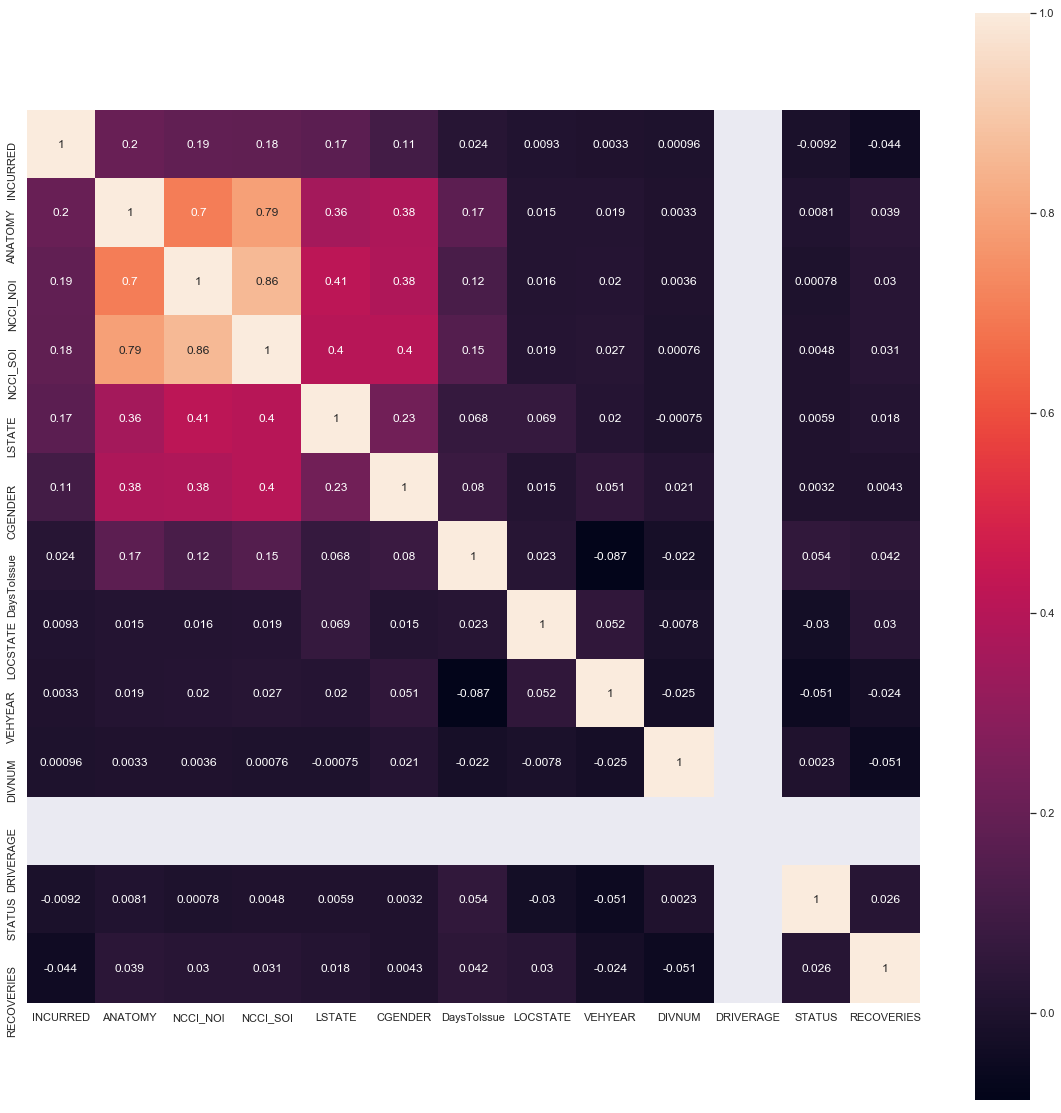

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_map = np.corrcoef(data2withoutTextcols[columns].values.T)
sns.set(font_scale=1.0)
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
heatmap = sns.heatmap(correlation_map,ax=ax, cbar=True, annot=True, square=True, yticklabels=columns.values, xticklabels=columns.values)
#plt.figure(figsize=(12,6))
plt.show()

In [41]:
data2withoutTextcols.describe()

STATUS   ANATOMY   CGENDER  LOCSTATE    DIVNUM    LSTATE   DTAXID  \
count  27382.00  27382.00  27382.00  27382.00  27382.00  27382.00  27382.0   
mean       0.08      3.19      0.32     24.10      0.30      0.87      0.0   
std        0.49     12.15      0.76     15.25      1.31      4.95      0.0   
min        0.00      0.00     -1.00     -1.00      0.00      0.00      0.0   
25%        0.00      0.00      0.00     10.00      0.00      0.00      0.0   
50%        0.00      0.00      0.00     23.00      0.00      0.00      0.0   
75%        0.00      0.00      0.00     36.00      0.00      0.00      0.0   
max        3.00     99.00      3.00     52.00     66.00     45.00      0.0   

        DSTATE   VEHYEAR  DRIVERAGE  EMPLSTATUS  NCCI_NOI  NCCI_SOI  NCCI_SEV  \
count  27382.0  27382.00   27380.00     27382.0  27382.00  27382.00   27382.0   
mean       0.0   1703.62      18.66         0.0      3.14      3.38       0.0   
std        0.0    715.58      22.46         0.0     12.58     12.56       0.0   
min        0.0      0.00      -1.00         0.0      0.00      0.00       0.0   
25%        0.0   1996.00       0.00         0.0      0.00      0.00       0.0   
50%        0.0   2003.00       0.00         0.0      0.00      0.00       0.0   
75%        0.0   2008.00      39.00         0.0      0.00      0.00       0.0   
max        0.0   2021.00      92.00         0.0     99.00     99.00       0.0   

       WEEKLYWAGE  MARITAL  RECOVERIES  INCURRED  DaysToIssue  
count     27382.0  27382.0    2.74e+04  2.74e+04     27382.00  
mean          0.0      0.0   -2.22e+04  7.11e+05        44.70  
std           0.0      0.0    1.45e+05  4.24e+06       105.99  
min           0.0      0.0   -6.83e+06  0.00e+00       -21.00  
25%           0.0      0.0    0.00e+00  9.50e+03         4.00  
50%           0.0      0.0    0.00e+00  2.08e+05        10.00  
75%           0.0      0.0    0.00e+00  5.41e+05        36.00  
max           0.0      0.0    0.00e+00  3.55e+08      2468.00

In [42]:
data2withoutTextcols = data2withoutTextcols.dropna(axis=0,how="any")

In [43]:
print(max(data2withoutTextcols['INCURRED']))

355412550


In [44]:
data2withoutTextcols.reset_index(inplace=True)

In [45]:
#Convert values for classification
for i in range(len(data2withoutTextcols['INCURRED'])):
    if(data2withoutTextcols['INCURRED'][i] <= 100000):
        data2withoutTextcols.loc[i,'INCURRED'] = 100000
    elif(data2withoutTextcols['INCURRED'][i] > 100000 and data2withoutTextcols['INCURRED'][i] < 500000):
        data2withoutTextcols.loc[i,'INCURRED'] = 250000
    elif(data2withoutTextcols['INCURRED'][i] >= 500000 and data2withoutTextcols['INCURRED'][i] < 1000000):
        data2withoutTextcols.loc[i,'INCURRED'] = 750000
    elif(data2withoutTextcols['INCURRED'][i] >= 1000000 and data2withoutTextcols['INCURRED'][i] < 3000000):
        data2withoutTextcols.loc[i,'INCURRED'] = 1500000
    elif(data2withoutTextcols['INCURRED'][i] >= 3000000 and data2withoutTextcols['INCURRED'][i] < 10000000):
        data2withoutTextcols.loc[i,'INCURRED'] = 5000000
    elif(data2withoutTextcols['INCURRED'][i] >= 10000000):
        data2withoutTextcols.loc[i,'INCURRED'] = 10000000
    

In [46]:
print(data2withoutTextcols['INCURRED'])

0         750000
1         100000
2         100000
3         250000
4         100000
5         100000
6         750000
7         250000
8         100000
9         100000
10        750000
11        100000
12        750000
13        750000
14        750000
15        250000
16        250000
17        100000
18        100000
19        250000
20        250000
21        750000
22        750000
23       1500000
24        100000
25        100000
26        100000
27        250000
28        100000
29        750000
          ...   
27350     100000
27351     250000
27352     100000
27353     100000
27354    1500000
27355     100000
27356     100000
27357     100000
27358     250000
27359     250000
27360     750000
27361     250000
27362     250000
27363     100000
27364     100000
27365     100000
27366    1500000
27367     100000
27368     100000
27369     100000
27370    1500000
27371     100000
27372     100000
27373    5000000
27374     750000
27375    1500000
27376     100000
27377     2500

In [47]:
"""#If with normalisation uncomment this and the next cell
x = data2withoutTextcols
y = x['INCURRED'].values
x = x.drop('INCURRED', axis = 1)"""
x = data2withoutTextcols
cols = x.columns
indices = x.index
y = x['INCURRED']
Y = pd.DataFrame(y,columns=['INCURRED'], index=indices)
x = x.drop('INCURRED', axis = 1)
cols = x.columns
indices = x.index
df = pd.DataFrame(x,columns=cols, index=indices)

In [48]:
len(x.columns)

19

In [49]:
len(data2withoutTextcols.columns)

20

In [50]:
"""
# Data Normalisation
from sklearn import preprocessing

cols = x.columns
indices = x.index

x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y = y.reshape(-1, 1)
Y = min_max_scaler.fit_transform(y)

df = pd.DataFrame(x_scaled,columns=cols, index=indices)
Y = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"""

"\n# Data Normalisation\nfrom sklearn import preprocessing\n\ncols = x.columns\nindices = x.index\n\nx = x.values\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\ny = y.reshape(-1, 1)\nY = min_max_scaler.fit_transform(y)\n\ndf = pd.DataFrame(x_scaled,columns=cols, index=indices)\nY = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"

In [51]:
df.isna().sum(axis=0)

index          0
STATUS         0
ANATOMY        0
CGENDER        0
LOCSTATE       0
DIVNUM         0
LSTATE         0
DTAXID         0
DSTATE         0
VEHYEAR        0
DRIVERAGE      0
EMPLSTATUS     0
NCCI_NOI       0
NCCI_SOI       0
NCCI_SEV       0
WEEKLYWAGE     0
MARITAL        0
RECOVERIES     0
DaysToIssue    0
dtype: int64

In [52]:
df.shape

(27380, 19)

In [53]:
df = df.dropna(axis=0,how="any")
df.reset_index(drop=True, inplace=True)
Y = Y.dropna(axis=0,how="any")
Y.reset_index(drop=True, inplace=True)

In [54]:
df.head()

index  STATUS  ANATOMY  CGENDER  LOCSTATE  DIVNUM  LSTATE  DTAXID  DSTATE  \
0      0       0        0        0        10       0       0       0       0   
1      1       0       30        2        10       0       0       0       0   
2      2       0        0        2        10       0       0       0       0   
3      3       0        0        0         3       0       0       0       0   
4      4       0        0        0        30       0       0       0       0   

   VEHYEAR  DRIVERAGE  EMPLSTATUS  NCCI_NOI  NCCI_SOI  NCCI_SEV  WEEKLYWAGE  \
0     2004       56.0           0         0         0         0           0   
1     2010       39.0           0         0        77         0           0   
2     2010       39.0           0         0         0         0           0   
3     2001       39.0           0         0         0         0           0   
4     2011        0.0           0         0         0         0           0   

   MARITAL  RECOVERIES  DaysToIssue  
0        0     -926424            9  
1        0           0           46  
2        0           0            5  
3        0           0            7  
4        0           0            9

In [55]:
df.shape

(27380, 19)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 100)

In [57]:
len(X_test)

6845

In [58]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

fig = plt.figure(figsize=(15,20))

def run_model(model, alg_name, plot_index):
    # build the model on training data
    model.fit(X_train, y_train)
    
    filename = 'finalized_model_classification' + alg_name + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100
    
    acc = accuracy / 100
    # binomial confidence interval
    from math import sqrt
    interval = 1.96 * sqrt( (acc * (1 - acc)) / 6845)
    
    print('%.3f' % interval)
    
    print(alg_name,",accuracy:",accuracy)


# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(model, "DecisionTree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
run_model(model, "RandomForest", 2)


# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVMClassifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "NearestNeighborsClassifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGDClassifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "GaussianNaiveBayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, " MLPNeuralnetwork ", 8)


0.012
DecisionTree ,accuracy: 43.886048210372536
0.012
RandomForest ,accuracy: 43.170197224251275


C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.012
SVMClassifier ,accuracy: 38.97735573411249
0.012
NearestNeighborsClassifier ,accuracy: 41.2417823228634


C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have be

0.011
SGDClassifier ,accuracy: 30.650109569028487
0.012
GaussianNaiveBayes ,accuracy: 41.256391526661794
0.010
 MLPNeuralnetwork  ,accuracy: 21.314828341855367


<Figure size 1080x1440 with 0 Axes>

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.43
Accuracy of Logistic regression classifier on test set: 0.44


C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [60]:
pred = list(logreg.predict(X_test))
#print(list(X_test.index))
j = 0
for i in list(y_test.index):
    print(pred[j],y_test[i])
    j = j + 1
#pred[0]

250000 750000
250000 750000
100000 250000
100000 750000
100000 100000
100000 250000
100000 100000
100000 750000
100000 100000
250000 250000
100000 750000
100000 250000
100000 100000
100000 100000
100000 100000
250000 1500000
1500000 1500000
100000 100000
100000 250000
1500000 250000
100000 100000
250000 250000
250000 100000
100000 750000
250000 100000
100000 100000
100000 1500000
250000 100000
100000 5000000
100000 100000
100000 100000
100000 100000
100000 100000
100000 100000
100000 100000
100000 250000
100000 100000
100000 100000
100000 250000
100000 100000
100000 100000
250000 750000
100000 100000
100000 1500000
100000 1500000
100000 100000
100000 100000
250000 1500000
100000 250000
100000 100000
100000 100000
100000 750000
100000 10000000
250000 250000
100000 100000
250000 100000
250000 250000
100000 750000
100000 100000
100000 250000
100000 1500000
250000 250000
100000 750000
100000 750000
100000 250000
100000 250000
100000 750000
100000 100000
100000 1500000
100000 750000
100000 

100000 250000
100000 100000
100000 1500000
250000 250000
250000 750000
100000 100000
100000 250000
100000 1500000
100000 250000
250000 750000
100000 100000
250000 250000
100000 100000
100000 100000
250000 750000
100000 1500000
100000 100000
100000 250000
100000 1500000
100000 100000
100000 1500000
100000 5000000
100000 750000
100000 250000
100000 100000
100000 750000
100000 100000
100000 100000
100000 10000000
100000 250000
100000 100000
250000 250000
100000 250000
100000 1500000
1500000 1500000
250000 250000
250000 100000
250000 250000
250000 100000
100000 100000
100000 100000
100000 750000
100000 100000
250000 250000
250000 250000
100000 100000
100000 750000
100000 250000
100000 250000
250000 750000
100000 100000
100000 100000
100000 250000
100000 100000
100000 10000000
100000 250000
100000 100000
100000 250000
250000 250000
100000 100000
100000 100000
100000 250000
100000 250000
100000 250000
100000 100000
100000 100000
100000 100000
250000 250000
250000 250000
250000 250000
250000 

100000 750000
250000 250000
250000 100000
100000 100000
100000 100000
250000 1500000
100000 100000
250000 1500000
100000 750000
100000 250000
250000 250000
100000 250000
100000 250000
250000 1500000
250000 250000
100000 100000
100000 10000000
250000 250000
250000 100000
100000 100000
100000 250000
100000 750000
100000 1500000
100000 100000
250000 750000
250000 750000
100000 1500000
100000 250000
250000 250000
250000 750000
100000 100000
100000 250000
250000 1500000
100000 750000
100000 100000
100000 100000
100000 250000
100000 250000
100000 250000
250000 5000000
100000 100000
100000 750000
100000 100000
100000 100000
100000 250000
250000 100000
100000 100000
250000 250000
100000 100000
100000 5000000
100000 250000
250000 750000
100000 1500000
250000 250000
100000 100000
100000 100000
100000 100000
100000 100000
100000 1500000
250000 250000
100000 250000
100000 100000
100000 250000
100000 1500000
250000 750000
100000 100000
100000 250000
100000 100000
250000 100000
100000 750000
250000 

100000 750000
100000 1500000
250000 250000
100000 100000
100000 750000
100000 250000
100000 5000000
100000 1500000
100000 750000
250000 100000
250000 100000
100000 1500000
100000 100000
100000 100000
100000 100000
100000 1500000
250000 250000
100000 100000
1500000 1500000
100000 750000
100000 250000
250000 100000
100000 250000
250000 250000
100000 100000
100000 250000
100000 250000
100000 100000
100000 750000
100000 100000
100000 100000
100000 250000
250000 250000
250000 100000
100000 100000
250000 250000
100000 250000
100000 100000
100000 100000
100000 100000
250000 250000
100000 750000
100000 250000
250000 100000
250000 1500000
100000 250000
100000 100000
100000 250000
250000 250000
100000 250000
100000 100000
100000 750000
100000 100000
100000 750000
100000 5000000
100000 750000
100000 250000
250000 750000
100000 750000
100000 250000
250000 1500000
100000 750000
250000 250000
100000 250000
100000 250000
100000 750000
100000 100000
250000 750000
250000 750000
100000 100000
100000 100

100000 100000
100000 100000
100000 100000
100000 1500000
250000 250000
250000 100000
100000 1500000
100000 250000
100000 250000
250000 100000
100000 5000000
250000 750000
250000 100000
250000 750000
100000 1500000
100000 1500000
100000 250000
100000 750000
250000 250000
100000 250000
100000 750000
100000 100000
100000 250000
250000 250000
250000 100000
250000 1500000
100000 5000000
100000 100000
100000 100000
100000 100000
100000 100000
100000 100000
100000 250000
100000 250000
100000 100000
100000 250000
100000 1500000
100000 100000
100000 750000
250000 250000
100000 5000000
100000 100000
100000 1500000
250000 250000
100000 250000
100000 250000
100000 250000
100000 250000
100000 100000
250000 100000
250000 250000
100000 100000
250000 100000
100000 100000
250000 1500000
100000 750000
250000 250000
1500000 100000
250000 250000
100000 250000
250000 250000
100000 1500000
100000 250000
100000 250000
100000 100000
250000 100000
100000 100000
100000 250000
100000 250000
100000 100000
750000 

100000 100000
100000 100000
100000 100000
250000 750000
100000 100000
100000 250000
100000 100000
100000 100000
100000 100000
100000 250000
250000 1500000
250000 100000
250000 250000
1500000 10000000
250000 250000
100000 250000
100000 750000
250000 250000
100000 250000
1500000 250000
100000 100000
100000 100000
250000 250000
100000 250000
250000 750000
250000 250000
100000 250000
100000 750000
250000 100000
100000 100000
100000 250000
250000 250000
250000 250000
250000 1500000
100000 1500000
100000 250000
250000 750000
250000 750000
250000 750000
250000 250000
250000 100000
100000 750000
250000 750000
100000 250000
100000 750000
100000 250000
100000 100000
100000 100000
100000 250000
100000 1500000
100000 750000
100000 250000
100000 750000
250000 5000000
100000 5000000
100000 100000
100000 100000
250000 250000
100000 100000
100000 1500000
100000 250000
100000 750000
250000 250000
100000 100000
100000 100000
100000 750000
250000 250000
250000 250000
250000 100000
100000 1500000
100000 1

100000 100000
100000 250000
250000 250000
100000 250000
100000 100000
100000 750000
100000 100000
100000 250000
100000 100000
100000 100000
250000 1500000
250000 250000
100000 250000
100000 1500000
250000 250000
100000 100000
100000 100000
250000 750000
100000 100000
100000 750000
250000 250000
100000 100000
100000 250000
100000 100000
250000 100000
100000 250000
250000 100000
100000 1500000
250000 250000
250000 100000
100000 100000
100000 100000
100000 750000
100000 100000
250000 250000
100000 100000
100000 100000
250000 750000
100000 100000
100000 1500000
100000 100000
100000 100000
100000 750000
100000 250000
100000 1500000
100000 100000
100000 250000
100000 750000
100000 250000
100000 250000
100000 250000
250000 750000
100000 100000
100000 750000
250000 250000
250000 250000
100000 100000
100000 250000
250000 750000
100000 750000
250000 750000
100000 100000
100000 100000
100000 100000
100000 100000
100000 250000
250000 1500000
100000 750000
250000 750000
100000 250000
100000 100000


250000 750000
100000 250000
100000 250000
100000 100000
100000 100000
100000 750000
100000 100000
100000 100000
100000 100000
100000 250000
100000 100000
100000 250000
100000 250000
250000 100000
100000 100000
100000 250000
100000 100000
100000 250000
100000 250000
100000 750000
100000 100000
100000 100000
100000 750000
100000 100000
250000 250000
250000 250000
100000 250000
100000 100000
100000 100000
100000 250000
100000 100000
250000 750000
100000 250000
100000 250000
100000 750000
100000 250000
100000 750000
100000 250000
1500000 100000
100000 250000
100000 100000
100000 100000
100000 100000
100000 100000
100000 100000
100000 250000
100000 100000
1500000 5000000
250000 100000
100000 250000
250000 1500000
100000 100000
100000 5000000
100000 100000
100000 100000
100000 250000
250000 100000
100000 100000
100000 100000
100000 5000000
100000 100000
100000 100000
100000 250000
100000 250000
250000 100000
100000 100000
100000 100000
100000 100000
250000 250000
100000 100000
250000 1500000

250000 250000
100000 1500000
100000 250000
250000 100000
100000 750000
100000 250000
100000 750000
100000 250000
100000 250000
100000 250000
100000 250000
250000 250000
100000 250000
100000 250000
100000 750000
250000 250000
250000 250000
100000 250000
100000 750000
100000 100000
250000 250000
100000 100000
100000 250000
1500000 5000000
100000 250000
100000 1500000
100000 100000
250000 1500000
100000 100000
100000 100000
100000 100000
100000 250000
100000 5000000
250000 250000
1500000 1500000
100000 750000
250000 250000
100000 100000
100000 100000
100000 750000
100000 100000
100000 250000
100000 250000
100000 100000
100000 750000
100000 750000
100000 1500000
250000 1500000
250000 250000
250000 250000
100000 100000
100000 250000
100000 10000000
250000 250000
100000 100000
100000 250000
250000 250000
100000 100000
100000 250000
100000 750000
100000 750000
100000 100000
100000 1500000
100000 250000
100000 250000
100000 100000
100000 100000
100000 750000
100000 750000
100000 1500000
100000

250000 100000
250000 250000
100000 250000
100000 100000
100000 250000
250000 100000
100000 100000
250000 1500000
100000 250000
100000 100000
100000 100000
100000 100000
100000 100000
100000 10000000
250000 100000
100000 100000
100000 250000
250000 100000
250000 250000
100000 250000
100000 1500000
100000 1500000
100000 250000
100000 250000
100000 100000
100000 250000
250000 100000
250000 250000
1500000 1500000
250000 750000
100000 750000
250000 100000
250000 5000000
100000 250000
100000 750000
100000 750000
250000 250000
100000 5000000
100000 100000
100000 750000
100000 100000
100000 250000
250000 750000
250000 250000
250000 100000
100000 100000
100000 100000
100000 1500000
250000 250000
100000 100000
100000 250000
250000 250000
100000 250000
100000 750000
100000 100000
100000 100000
100000 250000
250000 250000
250000 250000
100000 100000
100000 100000
100000 750000
100000 100000
100000 100000
100000 100000
250000 1500000
100000 100000
100000 750000
100000 100000
100000 250000
250000 25

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2129  512    1   18    1    4]
 [1511  802    7   13    0    2]
 [ 646  325    9   10    1    1]
 [ 380  167    5   58    1    3]
 [ 110   44    2   22    5    7]
 [  30    1    1   16    0    1]]
              precision    recall  f1-score   support

      100000       0.44      0.80      0.57      2665
      250000       0.43      0.34      0.38      2335
      750000       0.36      0.01      0.02       992
     1500000       0.42      0.09      0.15       614
     5000000       0.62      0.03      0.05       190
    10000000       0.06      0.02      0.03        49

   micro avg       0.44      0.44      0.44      6845
   macro avg       0.39      0.22      0.20      6845
weighted avg       0.43      0.44      0.37      6845



In [62]:
pred = list(model.predict(X_test))
#print(list(X_test.index))
j = 0
for i in list(y_test.index):
    print(pred[j],y_test[i])
    j = j + 1
#pred[0]

5000000 750000
750000 750000
250000 250000
750000 750000
750000 100000
750000 250000
750000 100000
750000 750000
250000 100000
250000 250000
750000 750000
750000 250000
750000 100000
750000 100000
250000 100000
750000 1500000
5000000 1500000
750000 100000
250000 250000
5000000 250000
250000 100000
750000 250000
750000 100000
750000 750000
750000 100000
250000 100000
750000 1500000
750000 100000
250000 5000000
750000 100000
750000 100000
750000 100000
250000 100000
750000 100000
5000000 100000
250000 250000
750000 100000
750000 100000
750000 250000
750000 100000
750000 100000
750000 750000
750000 100000
750000 1500000
5000000 1500000
750000 100000
750000 100000
750000 1500000
750000 250000
750000 100000
750000 100000
250000 750000
1500000 10000000
750000 250000
250000 100000
750000 100000
750000 250000
750000 750000
750000 100000
750000 250000
750000 1500000
250000 250000
750000 750000
750000 750000
750000 250000
750000 250000
750000 750000
750000 100000
750000 1500000
750000 750000
750

750000 100000
750000 750000
750000 5000000
250000 250000
250000 750000
750000 750000
750000 250000
750000 750000
750000 5000000
250000 750000
750000 250000
5000000 5000000
750000 5000000
250000 250000
750000 750000
750000 250000
750000 100000
750000 250000
750000 100000
750000 100000
750000 100000
750000 250000
250000 100000
750000 750000
750000 100000
250000 250000
250000 5000000
5000000 100000
250000 100000
750000 100000
100000 100000
250000 750000
750000 250000
750000 250000
750000 100000
750000 750000
750000 5000000
750000 1500000
750000 100000
250000 750000
750000 250000
750000 100000
100000 100000
750000 100000
750000 1500000
750000 250000
750000 100000
750000 100000
750000 5000000
750000 250000
750000 100000
250000 100000
250000 250000
250000 100000
5000000 100000
750000 100000
750000 250000
5000000 1500000
750000 100000
750000 100000
100000 250000
750000 250000
250000 100000
750000 5000000
750000 250000
100000 250000
750000 250000
750000 250000
250000 250000
750000 750000
25000

750000 100000
750000 250000
750000 100000
750000 1500000
750000 250000
750000 100000
750000 250000
250000 750000
250000 250000
750000 250000
5000000 250000
750000 250000
750000 100000
750000 250000
750000 250000
750000 250000
250000 1500000
750000 250000
750000 1500000
750000 250000
750000 750000
250000 100000
750000 100000
750000 250000
750000 1500000
250000 750000
750000 750000
750000 750000
250000 250000
750000 1500000
750000 100000
750000 100000
5000000 750000
750000 100000
750000 100000
750000 100000
750000 750000
750000 250000
5000000 100000
5000000 1500000
750000 250000
250000 250000
750000 100000
250000 250000
5000000 1500000
750000 250000
750000 250000
750000 100000
750000 100000
750000 100000
750000 250000
250000 250000
750000 100000
750000 100000
750000 1500000
750000 1500000
750000 750000
750000 250000
750000 100000
750000 100000
250000 250000
750000 250000
750000 100000
750000 100000
750000 100000
750000 250000
5000000 5000000
750000 750000
750000 1500000
750000 750000
750

250000 100000
5000000 10000000
250000 250000
250000 250000
100000 100000
750000 250000
750000 100000
750000 1500000
750000 250000
750000 100000
750000 100000
750000 250000
250000 100000
750000 250000
750000 100000
5000000 750000
750000 250000
750000 100000
750000 100000
750000 100000
750000 250000
250000 250000
250000 250000
750000 250000
750000 250000
100000 100000
750000 1500000
750000 100000
5000000 1500000
750000 1500000
750000 750000
750000 1500000
750000 100000
250000 5000000
750000 100000
750000 250000
750000 5000000
750000 250000
250000 100000
750000 1500000
750000 750000
750000 100000
250000 100000
750000 750000
750000 5000000
750000 750000
750000 100000
750000 100000
5000000 250000
250000 100000
250000 100000
250000 750000
750000 100000
750000 100000
750000 750000
750000 100000
750000 250000
5000000 750000
250000 100000
750000 5000000
750000 250000
100000 100000
250000 250000
750000 250000
5000000 250000
750000 250000
750000 250000
750000 250000
750000 250000
250000 750000
75

5000000 100000
750000 250000
250000 100000
750000 100000
250000 250000
750000 750000
5000000 250000
750000 750000
750000 100000
750000 100000
750000 250000
750000 250000
750000 100000
250000 250000
750000 250000
5000000 250000
250000 250000
750000 1500000
750000 100000
250000 250000
750000 100000
250000 250000
750000 250000
750000 100000
750000 250000
750000 250000
750000 100000
750000 100000
750000 100000
750000 100000
750000 100000
750000 100000
250000 100000
750000 100000
750000 100000
750000 250000
250000 100000
750000 100000
750000 250000
750000 250000
100000 100000
250000 250000
750000 1500000
750000 250000
750000 250000
750000 100000
750000 100000
5000000 100000
750000 250000
750000 750000
750000 250000
750000 100000
750000 100000
750000 100000
250000 750000
750000 100000
750000 100000
750000 1500000
750000 100000
750000 250000
250000 250000
750000 100000
250000 250000
250000 100000
750000 250000
250000 100000
5000000 1500000
750000 1500000
250000 1500000
100000 100000
250000 25

750000 100000
750000 750000
750000 100000
750000 250000
250000 750000
750000 250000
750000 750000
250000 250000
750000 100000
750000 250000
750000 100000
250000 750000
750000 750000
750000 100000
750000 100000
100000 250000
750000 250000
750000 750000
750000 100000
750000 250000
750000 250000
750000 250000
750000 750000
250000 100000
750000 100000
750000 1500000
750000 100000
750000 100000
250000 250000
750000 250000
750000 100000
750000 250000
750000 100000
750000 250000
750000 100000
5000000 750000
750000 1500000
750000 250000
5000000 100000
750000 100000
750000 250000
750000 250000
5000000 1500000
5000000 100000
250000 1500000
250000 250000
750000 250000
750000 750000
750000 250000
750000 100000
5000000 10000000
250000 100000
250000 1500000
750000 100000
750000 750000
750000 250000
750000 100000
750000 100000
250000 100000
250000 250000
750000 250000
750000 750000
750000 750000
750000 100000
750000 100000
750000 250000
5000000 1500000
100000 100000
750000 100000
750000 100000
500000

750000 100000
750000 250000
750000 250000
250000 100000
750000 100000
250000 250000
250000 100000
250000 250000
250000 250000
750000 100000
750000 750000
250000 250000
750000 100000
750000 100000
750000 250000
250000 100000
250000 250000
750000 100000
750000 750000
750000 100000
750000 100000
750000 100000
750000 100000
750000 250000
750000 750000
750000 750000
750000 100000
250000 250000
750000 250000
250000 750000
250000 100000
250000 100000
750000 100000
100000 100000
750000 250000
250000 100000
750000 750000
250000 250000
750000 100000
250000 250000
750000 750000
750000 100000
750000 1500000
750000 100000
5000000 1500000
750000 1500000
250000 100000
750000 250000
250000 100000
750000 100000
750000 100000
250000 100000
750000 100000
250000 100000
750000 5000000
750000 100000
250000 750000
250000 100000
250000 100000
5000000 100000
750000 250000
750000 100000
750000 750000
750000 100000
250000 250000
750000 100000
5000000 100000
750000 250000
750000 100000
750000 750000
750000 750000

750000 250000
250000 100000
250000 750000
250000 250000
750000 750000
750000 100000
750000 100000
750000 750000
250000 100000
750000 750000
250000 750000
5000000 10000000
750000 250000
5000000 250000
750000 250000
750000 750000
250000 250000
750000 250000
250000 100000
750000 750000
750000 250000
750000 100000
250000 250000
750000 750000
750000 100000
750000 250000
750000 100000
750000 250000
250000 100000
750000 100000
750000 100000
750000 1500000
750000 100000
750000 100000
750000 750000
750000 250000
750000 100000
100000 750000
750000 100000
750000 750000
250000 750000
750000 100000
750000 250000
750000 1500000
750000 250000
750000 250000
5000000 250000
750000 100000
250000 250000
750000 750000
5000000 100000
750000 250000
750000 100000
250000 250000
750000 100000
750000 250000
750000 100000
750000 750000
750000 100000
750000 250000
250000 250000
750000 250000
250000 250000
750000 250000
750000 250000
750000 750000
750000 250000
750000 100000
100000 100000
750000 250000
750000 15000

750000 100000
10000000 100000
750000 250000
750000 250000
750000 100000
750000 250000
750000 250000
250000 250000
750000 250000
250000 250000
750000 100000
250000 250000
750000 750000
750000 750000
750000 100000
250000 250000
5000000 100000
750000 100000
750000 100000
750000 750000
750000 1500000
750000 100000
750000 100000
750000 100000
750000 250000
250000 250000
750000 750000
750000 750000
750000 100000
250000 250000
750000 100000
750000 100000
750000 100000
750000 100000
750000 5000000
250000 250000
750000 250000
750000 1500000
750000 100000
250000 250000
750000 100000
750000 250000
750000 1500000
250000 100000
250000 250000
750000 100000
750000 250000
250000 100000
750000 1500000
750000 250000
750000 250000
250000 250000
250000 250000
250000 100000
750000 750000
750000 100000
250000 5000000
750000 100000
750000 100000
750000 100000
250000 100000
750000 100000
250000 100000
5000000 250000
750000 750000
750000 250000
750000 100000
5000000 1500000
750000 250000
750000 100000
750000 1

750000 250000
750000 100000
750000 100000
5000000 750000
5000000 750000
750000 250000
750000 250000
750000 100000
750000 1500000
750000 1500000
750000 100000
5000000 1500000
750000 100000
750000 250000
750000 250000
250000 100000
100000 100000
750000 100000
250000 250000
750000 100000
750000 100000
5000000 250000
250000 250000
750000 100000
750000 100000
750000 250000
250000 750000
750000 100000
750000 250000
750000 100000
250000 250000
750000 100000
750000 5000000
250000 100000
750000 100000
750000 100000
5000000 10000000
750000 250000
250000 750000
5000000 750000
750000 250000
250000 250000
750000 750000
750000 100000
750000 100000
750000 100000
750000 1500000
750000 250000
100000 100000
750000 100000
250000 250000
750000 100000
750000 100000
750000 100000
100000 100000
250000 250000
750000 250000
5000000 250000
250000 250000
750000 250000
750000 250000
750000 750000
100000 100000
750000 100000
750000 100000
750000 250000
750000 750000
250000 250000
750000 250000
750000 250000
750000